# PCA - Principal Component Analysis

**Problem**: you have a multidimensional set of data (such as a set of hidden unit activations) and you want to see which points are closest to others.

PCA allows you to identify the dimensions of greatest variance, to the dimensions of least variance. PCA1 has greatest variance.

## Example

Let's look at a dataset that has nothing to do with networks: measurements of flowers, specifically Irises.

In [16]:
# Cogemos los datos
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
import pandas as pd
# Creamos el dataframe
df = pd.DataFrame(data=iris.data, columns=iris.get("feature_names"))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df_ = pd.DataFrame(data=iris.data, columns=iris.get("feature_names"))
df_.iloc[90, :]

sepal length (cm)    5.5
sepal width (cm)     2.6
petal length (cm)    4.4
petal width (cm)     1.2
Name: 90, dtype: float64

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.decomposition import PCA

In [48]:
# Dos posibilidades: 

# Valor con rango (0, 1) -- Trata de encontrar una dimensión inferior que mantenga el porcentaje de varianza explicativa r^2. Da el mínimo número de pasos necesarios.
# Darle un valor incremental (1 a 1) de 0 a infinito que representa la dimensión a la que queremos llegar.

pca = PCA(0.95) 

Si cuando pongo en PCA n_components, en porcentaje es relativo, si el valor que le doy es mayor que pca.explained_variance_ratio_ nos da dos dimensiones porque si baja otra se va del 0.92. Si pongo un valor menor, baja a una dimension.

In [ ]:
# pca.fit_transform(iris.data) hace lo mismo que hacer fit primero y luego transform 

In [49]:
pca.fit(iris.data)

PCA(n_components=0.95)

In [50]:
# El primer valor es la varianza explicativa de la mejor proyección de nuestro PCA 
pca.explained_variance_ratio_

# El 0.05 es la perpendicular que es la que menos información provee

array([0.92461872, 0.05306648])

In [51]:
X = pca.transform(iris.data) # Transform lo convierte el dos columnas 
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [11]:
df = pd.DataFrame(data=X)
df

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [12]:
X = pca.fit_transform(iris.data)
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

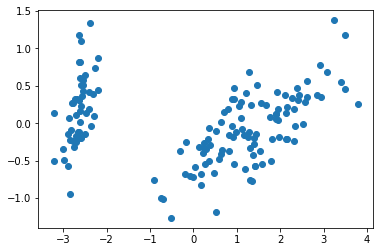

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]) # Nos muestra como ha pasado de las 4 dimensiones a las 2 dimensiones


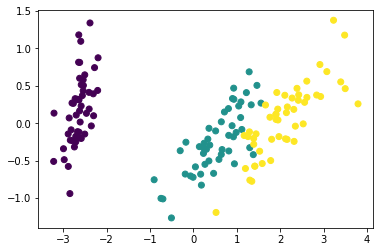

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=iris.target) 
# c es el atributo de color, entonces sabemos a que clase se corresponden. Cuando hacemos el PCA se modifican las columnas, no las filas. Estamos diciendo que nos pinte cada uno de los puntos que están representados dependiendo de la clase. Este PCA sí está encontrando 3 tipos diferentes de clases. 

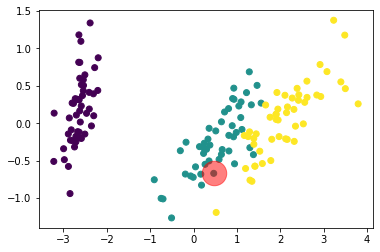

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.scatter([X[90][0]], [X[90][1]], s=600, c=["r"], alpha=0.5) # s --> tamaño
# Cogemos el punto de la fila 90 (clase 1) 

In [76]:
# Ahora ya tendríamos una X reducida y en la que se mantiene un r^2 de 0.92

# 1. Split de datos
# 2. Elijo el modelo y encuentro las mejores features.
# 3. Entreno el modelo (con todos los datos, cross validation con todos los datos o cross validation poquito a poco). Podemos ver el score de validación y sacar conclusiones.
# 4. Sacamos el score de test y vemos si la elección ha sido buena. Si no, vuelvo al punto 2. 
# 5. Si nos gusta nuestros resultados, entrenamos el modelo con todos los datos. 
# 6. Guardamos el modelo y se lo damos a quien lo necesite.
# 7. Seguimos probando otras opciones. 